## Programming for Data Analytics Project
### Contact Centre Key Performance Indicators

In [434]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
from IPython.display import Image
import datetime as dt

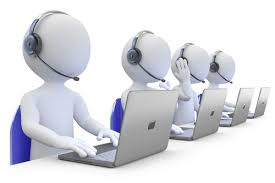

In [223]:
Image("Callpic.jpg") #load call centre image

### Contact Center
Contact centers offer omnichannel customer support for a nuber of different services including email, chat, voice over IP (VoIP) and website support. The purpose of this project is to demonstrate the benefits of simulated data analysis for the customer service sector. The Customer contact data can be simulated using Numpy random distributions which can then be used to predict contact center key performance indicators and measure how change can affect performance against service level agreements. For this Project, the focus will be on the volume of monthly incoming voice calls to a small customer support center. A working hypothesis based on typical contact senter data is generated to simulate a working model of key metrics associated with monthly incoming voice communication. Modeling and predictive simulation can add value to the call center sector. In any competetive environment there is a level of change and the business that has the best understanding of this is best placed to have a competitative edge. From a progressive managament point of view, modeling and simulation can help convince team members the necessity of change to improve business processes and reduce time to complete tasks. It can be used to identify risks like underachievement of call center metrics and revenue liabilites due to service level agreements. 

### Incoming Calls
Incoming voice calls are one of the most significant workflows for contact center support staff. The volume of calls varies  from day to day and is a challenge for management to meet resource and service level agreement demands. Simulated contact center communication data for this project is generated via the Numpy random distributions such as the Poisson distribution. The Poisson distribution, named after French mathematician S. D. Poisson, is a statistical distribution showing the likely number of times that an event will occur within a specified period of time.(1) Various research on the Poisson distribution show how suitable it is at simulating the arrivals at a facility within a set period of time. Two values are required for numpy.random.poisson, the mean value and the number of records reuired. A small sized Informtion Technology support center would expect to receive on average, 180 voice calls daily. I have used a monthly mean value of 3617 (five day week) to simulate monthly voice traffic for 120 periods (10 years).

#### Simulate date
Generate future dates using Pandas function date_range, with a monthly frequency and 100 periods.

In [424]:
rng = pd.date_range('1/1/2019', periods = 120, freq = 'M')

#### Load Dataframe
Pandas DataFrame is an in-memory representation of an excel sheet in the Python. Load Dataframe Calls column with a poisson mean value of 3617 for 100 rows (months). Graphing the result highlights the expected peaks and troughs associated with contact center voice traffic.

count     120
mean     3623
std        65
min      3480
50%      3624
max      3779
Name: Calls, dtype: int32

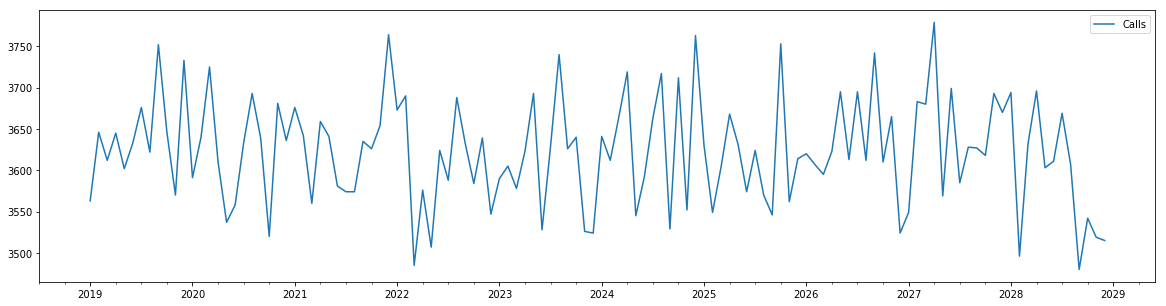

In [425]:
Calls = pd.DataFrame(np.random.poisson(3617, len(rng)), index=rng, columns = ["Calls"]) # set mean incoming call value = 3617
Calls.plot(y=['Calls'], use_index=True, figsize=(20, 5)) # show graph of simulated voice calls
Calls['Calls'].describe(percentiles=[]).astype(int) # check min, max, mean values

### Average Speed of Answer 
In order to ensure a customer's wait time is within an acceptable range, management need to keep track of average speed of answer. This metric is the total time callers wait for Answered calls divided by the total number of calls answered by agents. This includes the amount of time callers wait in a waiting queue and while the agent’s phone rings however does not include the time it takes for callers to navigate through the interactive voice response (IVR) system. It is a great indicator of whether or not your team is providing their callers with the service they deserve.(2) From my research, I have found that this measure is closely related to customer satisfaction and is often included in the overall customer satisfaction rating. In everyday business, no customer likes to wait for a long time to buy groceries or to be served in a restaurant. Customers are unlikely to return if they leave without being served. This logic also applies to contact canter customers. Average waiting time must be kept to a minimum in order to help management achieve customer satisfaction targets. The global metric (3) is 28 seconds. 

Average Speed of Answer = Total Waiting Time for Answered Calls/Total Number of Answered Calls



#### Load Dataframe
Load Dataframe with Numpy random.randint values of between 12 and 35, filling 100 rows (months)

count    120
mean      22
std        6
min       12
50%       23
max       34
Name: ASA, dtype: int32

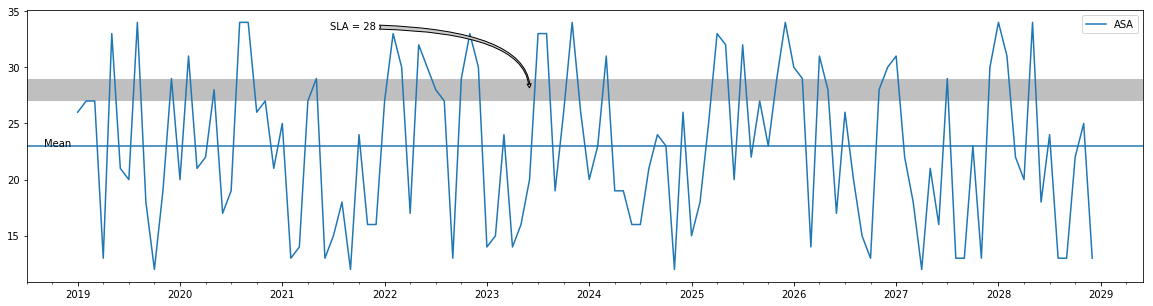

In [410]:
Calls["ASA"] = pd.DataFrame.assign(np.random.randint(12,35, len(rng))) # randomly generate time in Q - values between 5 - 23
Calls.plot(y=['ASA'], use_index=True, figsize=(20, 5)) # show graph of simulated time in Q
plt.axhspan(27, 29, facecolor='0.5', alpha=0.5) # show global metric between 27 - 29
import datetime as dt

l = plt.axhline(y=Calls["ASA"].mean())
plt.text(dt.date(2018, 9,1), Calls["ASA"].mean(), "Mean")
#plt.annotate('Global Metric = 28',ha = 'center', va = 'bottom', xytext = (dt.date(2024, 6,1), 33), xy = (dt.date(2024, 9,1), 28),
            # arrowprops = { 'facecolor' : '0.5', 'shrink' : 0.05 })
plt.annotate('SLA = 28', xy=(dt.date(2023, 6,1), 28), xycoords='data',
            xytext=(-200,60), textcoords='offset points',
            arrowprops=dict(arrowstyle='fancy',fc='0.8',
                            connectionstyle="angle3,angleA=0,angleB=-90"))

Calls['ASA'].describe(percentiles=[]).astype(int) # check resulting min, max, mean values

In [315]:
df5 = Calls['ASA'].resample('Y').mean()
df5

2019-12-31    21.500000
2020-12-31    20.166667
2021-12-31    22.000000
2022-12-31    19.166667
2023-12-31    23.916667
2024-12-31    25.666667
2025-12-31    23.750000
2026-12-31    24.333333
2027-12-31    22.666667
2028-12-31    21.250000
Freq: A-DEC, Name: ASA, dtype: float64

Text(10,25,'SLA')

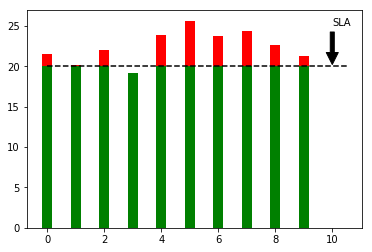

In [319]:

# some example data
threshold = 20.0
values = Calls['ASA'].resample('Y').mean()
x = range(len(values))

# split it up
above_threshold = np.maximum(values - threshold, 0)
below_threshold = np.minimum(values, threshold)

# and plot it
fig, ax = plt.subplots()
ax.bar(x, below_threshold, 0.35, color="g")
ax.bar(x, above_threshold, 0.35, color="r",
        bottom=below_threshold)

# horizontal line indicating the threshold
ax.plot([0., 10.5], [threshold, threshold], "k--", )
ax.annotate('SLA', xy=(10, 20), xytext=(10, 25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )


### Abandoned Calls
This is the number of callers that hang up before an agent answers. Calls can be abandoned for different reasons. I have centered the generation of the random poisson number around a mean of 250. This number will be used in calculation of the Abandonment rate. 

count    120
mean     251
std       15
min      208
50%      253
max      285
Name: Aband, dtype: int32

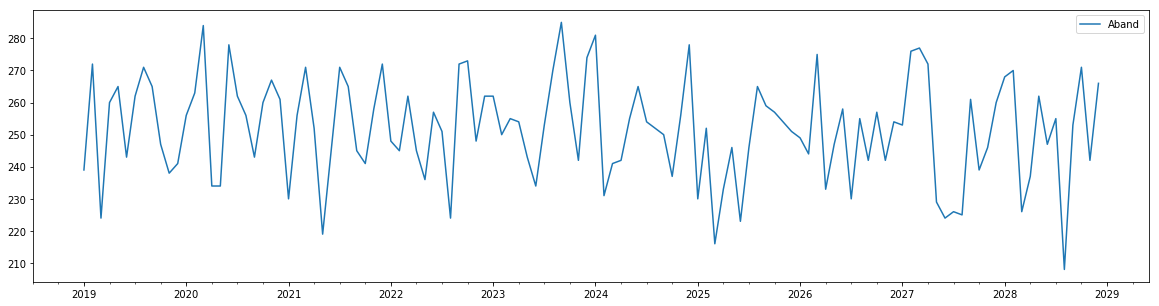

In [427]:
Calls["Aband"] = pd.DataFrame.assign(np.random.poisson(250, len(rng))) # mean value for Abandoned calls = 320
Calls.plot(y=['Aband'], use_index=True, figsize=(20, 5)) # show graph of simulated abandoned calls
Calls['Aband'].describe(percentiles=[]).astype(int) # check resulting min, max, mean values

### Abandonment Rate
Call abandonment is the percentage of callers who hang up before reaching an agent. This is a common occurrence in a call center and has a detrimental impact on customer retention. (2) From research, I have learned that call center management need to keep a close eye on abandonment rate as an a high rate can  adversely affect the caller satisfaction rate. The global metric (3) for Abandonment Rate in a contact center is between 5% – 8%. The metric is calculated by dividing the number of Abandoned Calls by the Total Incoming call number. 


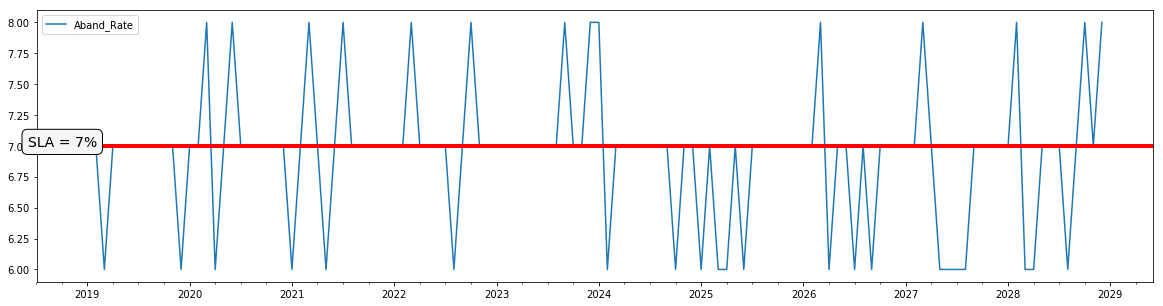

In [451]:
Calls["Aband_Rate"] = pd.DataFrame.assign((Calls.Aband / Calls.Calls)*100).apply(np.round) # calculate Abandonment rate
Calls.plot(y=['Aband_Rate'], use_index=True, figsize=(20, 5)) # show graph of simulated voice calls
Calls['Aband_Rate'].describe(percentiles=[]).astype(int) # check resulting min, max, mean values
plt.axhline(y=7, linewidth=4, color='r') # highlight SLA = 7%
plt.text(x=dt.date(2018, 6,1), y=7, s="SLA = 7%", fontsize=14,
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.4"));

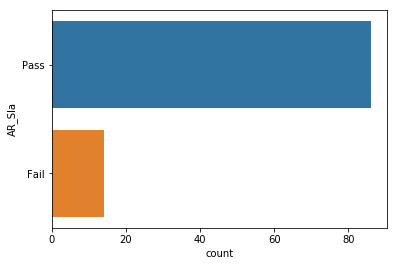

In [247]:
Calls.loc[Calls.Aband_Rate >= 7, 'AR_Sla'] = 'Pass' 
Calls.loc[Calls.Aband_Rate < 7, 'AR_Sla'] = 'Fail'

from seaborn import countplot
from matplotlib.pyplot import figure, show
figure()
countplot(data=Calls,y='AR_Sla')
show()
#Calls.plot(y=['AR_Sla'], use_index=True, figsize=(20, 5)) # show graph of simulated voice calls

### Service Level
Service level is the percentage of calls answered within a specified timeframe. The global metric (3) for Service Level in contact centers is 80% of calls answered within 20 seconds. I have simulated a service level range of values between 50% - 84% in this notebook by setting Numpy random.poisson mean value to 65. 

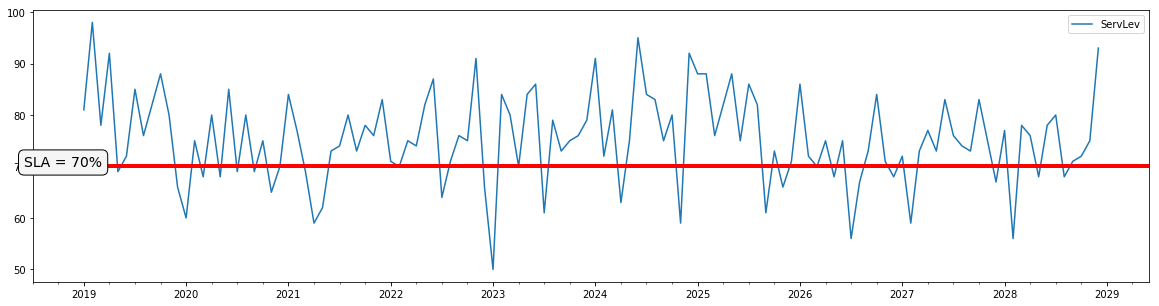

In [453]:
Calls["ServLev"] = pd.DataFrame.assign(np.random.poisson(75, len(rng))) # mean service level value = 65
Calls.plot(y=['ServLev'], use_index=True, figsize=(20, 5)) # show graph of service level
Calls['ServLev'].describe(percentiles=[]).astype(int) # check resulting min, max, mean values
plt.axhline(y=70, linewidth=4, color='r') # highlight SLA = 7%
plt.text(x=dt.date(2018, 6,1), y=70, s="SLA = 70%", fontsize=14,
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.4"));

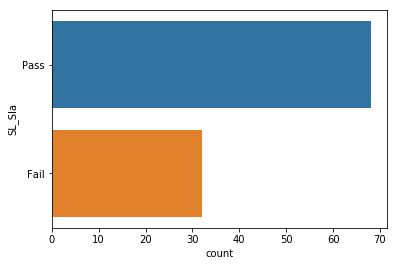

In [250]:
Calls.loc[Calls.ServLev >= 70, 'SL_Sla'] = 'Pass' 
Calls.loc[Calls.ServLev < 70, 'SL_Sla'] = 'Fail'

from seaborn import countplot
from matplotlib.pyplot import figure, show
figure()
countplot(data=Calls,y='SL_Sla')
show()

### Net Promoter Score
Net Promoter Score, NPS is a measure of the customer's overall  opinion of the company and helps to determine customer loyalty. It is based on a simple question of how likely a customer is to recommend the service to a friend. It is simple and easy to understand, using a scale of 0 - 10, with 10 being most likely to recommend. The great benefit of NPS is that it easily identifies unsatisfied customers who may be at risk of leaving. Based on the customer's response, customers are assigned a label. Detractors respond with a score of 0 - 6, Passives in the 7 - 8 range and Promoters in the 9 - 10 range. (4)

NPS score = Promoters% - Detractors%

The benchmark (5) NPS for Telecommunication companies is 32. 


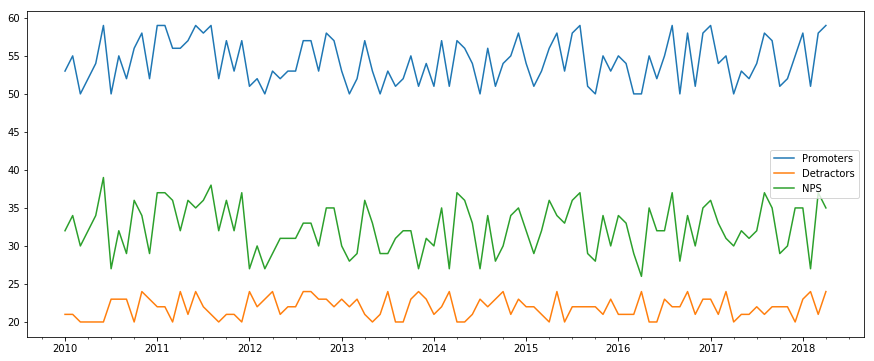

In [251]:
Calls['Promoters'] = np.random.randint(50,60, size=len(rng))
Calls['Detractors'] = np.random.randint(20,25, size=len(rng))
Calls["NPS"] =  Calls['Promoters'] - Calls['Detractors']
#Calls.describe()
Calls.plot(y=['Promoters','Detractors', 'NPS'], use_index=True, figsize=(15,6))

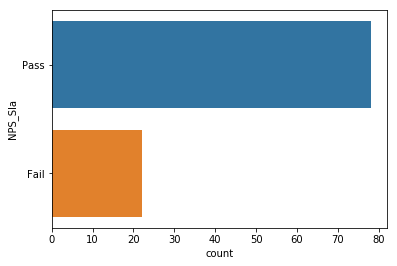

In [252]:
Calls.loc[Calls.NPS >= 30, 'NPS_Sla'] = 'Pass' 
Calls.loc[Calls.NPS < 30, 'NPS_Sla'] = 'Fail'

from seaborn import countplot
from matplotlib.pyplot import figure, show
figure()
countplot(data=Calls,y='NPS_Sla')
show()

### Key Performance Indicator Score

Analyzing call center key performance indicators (KPIs) is imperative when assessing the effectiveness and efficiency of a call center. While it is clear to most call center managers and decision-makers that they need to analyze call center KPIs, what is often not so clear is which KPIs to measure and track over time. Th


Service-level agreement: A contract where service providers commit to delivering a set standard of service to clients and/or customers.

Success indicators
Consistently delivering services that meet or exceed the expectations set out in the SLA.

Measure your ability to deliver on commitments made in your service level agreements (SLAs).


In [220]:
Calls["KPI_Score"] = Calls["Aband_Rate"] + Calls["ServLev"] + Calls["ASA"] + Calls["NPS"]
Calls.describe().astype(int)
#Calls = Calls.drop(['Calls', 'Aband', 'Aband_Rate', 'ServLev', 'ASA', 'Detractors', 'Promoters', 'NPS', 'KPI_Score' ], axis=1)

In [423]:
#Calls

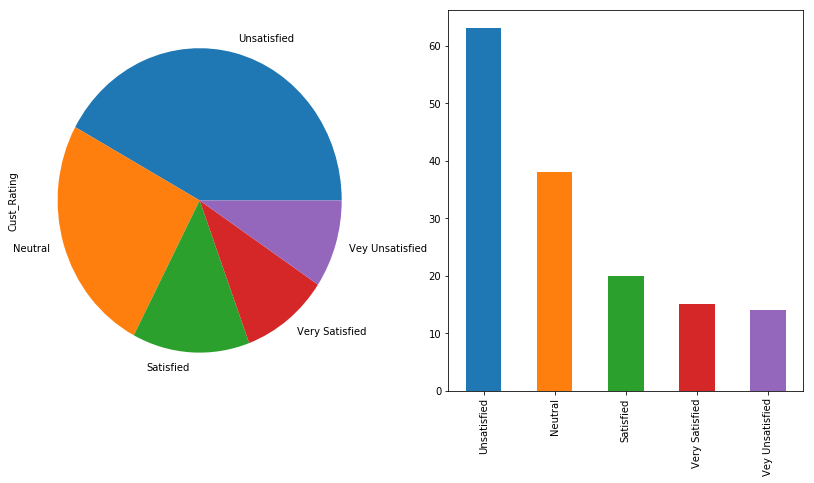

In [192]:
df4 = Calls['Cust_Rating'].value_counts()
plt.subplot(1,2,1)
df4.plot.pie(figsize=(14,7));

plt.subplot(1,2,2)
df4.plot.bar(figsize=(14,7));

In [230]:
Calls.loc['2017-11-30':'2018-05-31']

,Calls,Avg_Q,Aband,Aband_Rate,ServLev,AvgHand,eMails,NumAgent,Avail,Ocup%,Fcr%,Sfact
2017-11-30,3614,16,312,8.633094,59,7,466,240,324,74.0,53,61
2017-12-31,3543,17,328,9.257691,68,17,474,253,349,72.0,48,75
2018-01-31,3669,16,305,8.312892,65,14,494,231,353,65.0,41,70
2018-02-28,3638,19,304,8.356240,68,11,505,247,339,73.0,37,73
2018-03-31,3676,16,326,8.868335,55,18,501,253,359,70.0,47,99
2018-04-30,3558,15,329,9.246768,76,15,521,235,367,64.0,53,82
2018-05-31,3622,7,312,8.614025,66,18,492,211,361,58.0,58,67


In [178]:
Calls.loc['2017-11-30':'2018-05-31'].mean().astype(int)

Calls         3618
Avg_Q           16
Aband          313
Aband_Rate       8
ServLev         62
AvgHand         13
eMails         493
NumAgent       253
Avail          353
Ocup%           71
Fcr%            53
Sfact           71
dtype: int32

In [179]:
Calls.resample('Y').mean().astype(int)

,Calls,Avg_Q,Aband,Aband_Rate,ServLev,AvgHand,eMails,NumAgent,Avail,Ocup%,Fcr%,Sfact
2006-12-31,3611,14,310,8,67,15,498,238,342,70,49,68
2007-12-31,3621,14,322,8,66,16,500,243,360,67,48,71
2008-12-31,3623,15,320,8,64,17,498,239,353,67,50,70
2009-12-31,3616,16,316,8,65,15,518,234,345,68,51,72
2010-12-31,3608,15,316,8,62,13,498,240,346,69,49,72
2011-12-31,3617,16,333,9,68,16,490,239,348,68,52,68
2012-12-31,3621,13,321,8,61,15,507,241,354,68,49,67
2013-12-31,3621,15,325,8,64,15,498,237,339,70,48,66
2014-12-31,3611,15,323,8,61,15,494,237,343,69,52,69
2015-12-31,3581,15,325,9,64,14,505,236,353,67,48,71


In [180]:
Calls.head()

,Calls,Avg_Q,Aband,Aband_Rate,ServLev,AvgHand,eMails,NumAgent,Avail,Ocup%,Fcr%,Sfact
2006-01-31,3550,19,295,8.309859,66,8,525,240,348,69.0,49,66
2006-02-28,3466,18,332,9.578765,71,14,515,256,327,78.0,44,62
2006-03-31,3702,8,323,8.725014,73,13,512,251,321,78.0,50,66
2006-04-30,3641,19,326,8.953584,60,12,511,227,370,61.0,48,73
2006-05-31,3642,19,341,9.362987,63,23,523,225,326,69.0,53,70


In [181]:
Temp = Calls.loc[Calls['Avg_Q'] <= 22]
Temp.head()

,Calls,Avg_Q,Aband,Aband_Rate,ServLev,AvgHand,eMails,NumAgent,Avail,Ocup%,Fcr%,Sfact
2006-01-31,3550,19,295,8.309859,66,8,525,240,348,69.0,49,66
2006-02-28,3466,18,332,9.578765,71,14,515,256,327,78.0,44,62
2006-03-31,3702,8,323,8.725014,73,13,512,251,321,78.0,50,66
2006-04-30,3641,19,326,8.953584,60,12,511,227,370,61.0,48,73
2006-05-31,3642,19,341,9.362987,63,23,523,225,326,69.0,53,70


### Greater or equal to !!!  Really GOOD!!!!!!!

In [182]:
Calls.loc[Calls.Aband <= 50, 'Aband50?'] = 'True' 
Calls.loc[Calls.Aband > 50, 'Aband50?'] = 'False' 
Calls.head()

,Calls,Avg_Q,Aband,Aband_Rate,ServLev,AvgHand,eMails,NumAgent,Avail,Ocup%,Fcr%,Sfact,Aband50?
2006-01-31,3550,19,295,8.309859,66,8,525,240,348,69.0,49,66,False
2006-02-28,3466,18,332,9.578765,71,14,515,256,327,78.0,44,62,False
2006-03-31,3702,8,323,8.725014,73,13,512,251,321,78.0,50,66,False
2006-04-30,3641,19,326,8.953584,60,12,511,227,370,61.0,48,73,False
2006-05-31,3642,19,341,9.362987,63,23,523,225,326,69.0,53,70,False


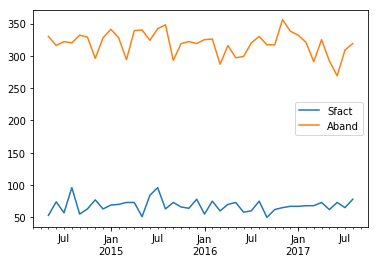

In [183]:
Calls.iloc[100:140].plot(y=['Sfact','Aband'], use_index=True)

In [184]:
Calls.head()

,Calls,Avg_Q,Aband,Aband_Rate,ServLev,AvgHand,eMails,NumAgent,Avail,Ocup%,Fcr%,Sfact,Aband50?
2006-01-31,3550,19,295,8.309859,66,8,525,240,348,69.0,49,66,False
2006-02-28,3466,18,332,9.578765,71,14,515,256,327,78.0,44,62,False
2006-03-31,3702,8,323,8.725014,73,13,512,251,321,78.0,50,66,False
2006-04-30,3641,19,326,8.953584,60,12,511,227,370,61.0,48,73,False
2006-05-31,3642,19,341,9.362987,63,23,523,225,326,69.0,53,70,False


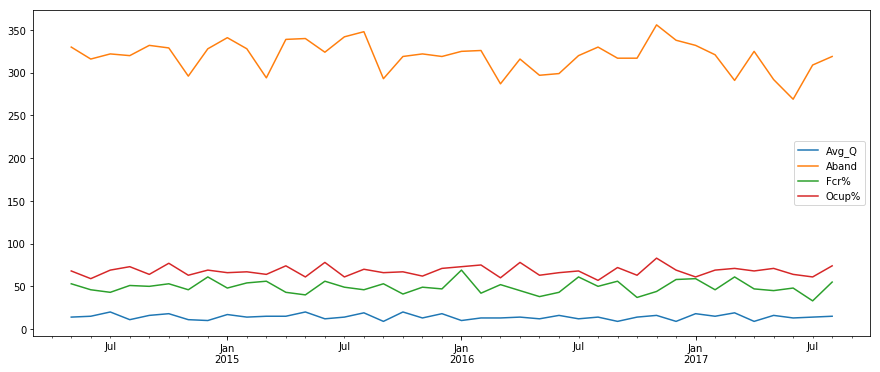

In [185]:
#Calls.plot(y=['Avg_Wait','Aband', 'ServLev', 'SpdAns', 'Ocup %', 'Sfact'], use_index=True)
Calls.iloc[100:140].plot(y=['Avg_Q','Aband', 'Fcr%', 'Ocup%'], use_index=True, figsize=(15,6))

### True/False Hue really good for SLA.......

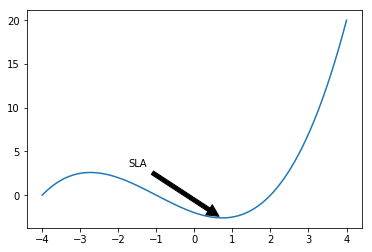

In [413]:
X = np.linspace(-4, 4, 1024)
Y = .25 * (X + 4.) * (X + 1.) * (X - 2.)

plt.annotate('SLA',ha = 'center', va = 'bottom', xytext = (-1.5, 3.), xy = (0.75, -2.7),
arrowprops = { 'facecolor' : 'black', 'shrink' : 0.05 })


plt.plot(X, Y)
plt.show()

In [186]:
#Calls.loc[Calls.Sfact <= 75, 'Cust Satisfied?'] = 'True' 
#Calls.loc[Calls.Sfact > 75, 'Cust Satisfied?'] = 'False' 
#Calls.head()

In [187]:
Calls1 = Calls.loc[:, 'eMails':'Ocup%']
Calls1.head()

,eMails,NumAgent,Avail,Ocup%
2006-01-31,525,240,348,69.0
2006-02-28,515,256,327,78.0
2006-03-31,512,251,321,78.0
2006-04-30,511,227,370,61.0
2006-05-31,523,225,326,69.0


In [188]:
df= Calls.loc[:, ['Calls', 'Aband']]
df.head()

,Calls,Aband
2006-01-31,3550,295
2006-02-28,3466,332
2006-03-31,3702,323
2006-04-30,3641,326
2006-05-31,3642,341


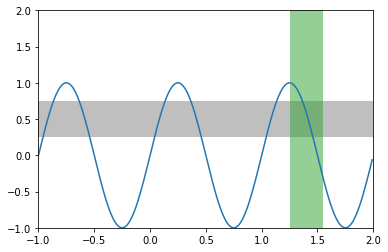

In [422]:

t = np.arange(-1, 2, .01)
s = np.sin(2*np.pi*t)

plt.plot(t, s)
# draw a thick red hline at y=0 that spans the xrange
#l = plt.axhline(linewidth=8, color='#d62728')

# draw a default hline at y=1 that spans the xrange
#l = plt.axhline(y=1)

# draw a default vline at x=1 that spans the yrange
#l = plt.axvline(x=1)

# draw a thick blue vline at x=0 that spans the upper quadrant of
# the yrange
#
#l = plt.axvline(x=0, ymin=0.75, linewidth=8, color='#1f77b4')

# draw a default hline at y=.5 that spans the middle half of
# the axes
#l = plt.axhline(y=.5, xmin=0.25, xmax=0.75)

p = plt.axhspan(0.25, 0.75, facecolor='0.5', alpha=0.5)

p = plt.axvspan(1.25, 1.55, facecolor='#2ca02c', alpha=0.5)

plt.axis([-1, 2, -1, 2])


plt.show()

### Customer Satisfaction !!!!!!!!!!!!

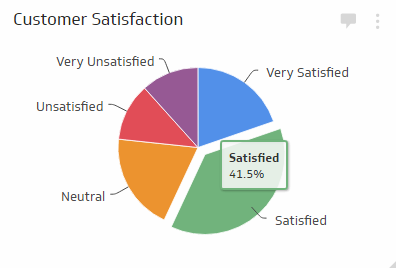

In [189]:
Image("CustSatisf.png")

In [191]:
Calls.loc[Calls.Sfact >= 80, 'Cust_Rating'] = 'Very Satisfied' 
Calls.loc[Calls.Sfact < 80, 'Cust_Rating'] ='Satisfied'
Calls.loc[Calls.Sfact < 75, 'Cust_Rating'] = 'Neutral' 
Calls.loc[Calls.Sfact < 70, 'Cust_Rating'] = 'Unsatisfied' 
Calls.loc[Calls.Sfact < 60, 'Cust_Rating'] = 'Vey Unsatisfied' 
Calls.head()

,Calls,Avg_Q,Aband,Aband_Rate,ServLev,AvgHand,eMails,NumAgent,Avail,Ocup%,Fcr%,Sfact,Aband50?,Cust_Rating
2006-01-31,3550,19,295,8.309859,66,8,525,240,348,69.0,49,66,False,Unsatisfied
2006-02-28,3466,18,332,9.578765,71,14,515,256,327,78.0,44,62,False,Unsatisfied
2006-03-31,3702,8,323,8.725014,73,13,512,251,321,78.0,50,66,False,Unsatisfied
2006-04-30,3641,19,326,8.953584,60,12,511,227,370,61.0,48,73,False,Neutral
2006-05-31,3642,19,341,9.362987,63,23,523,225,326,69.0,53,70,False,Neutral


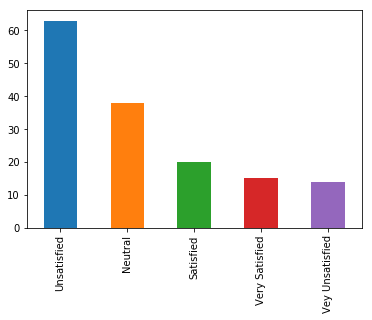

In [194]:
df4.plot.bar();

In [195]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
plt.show()

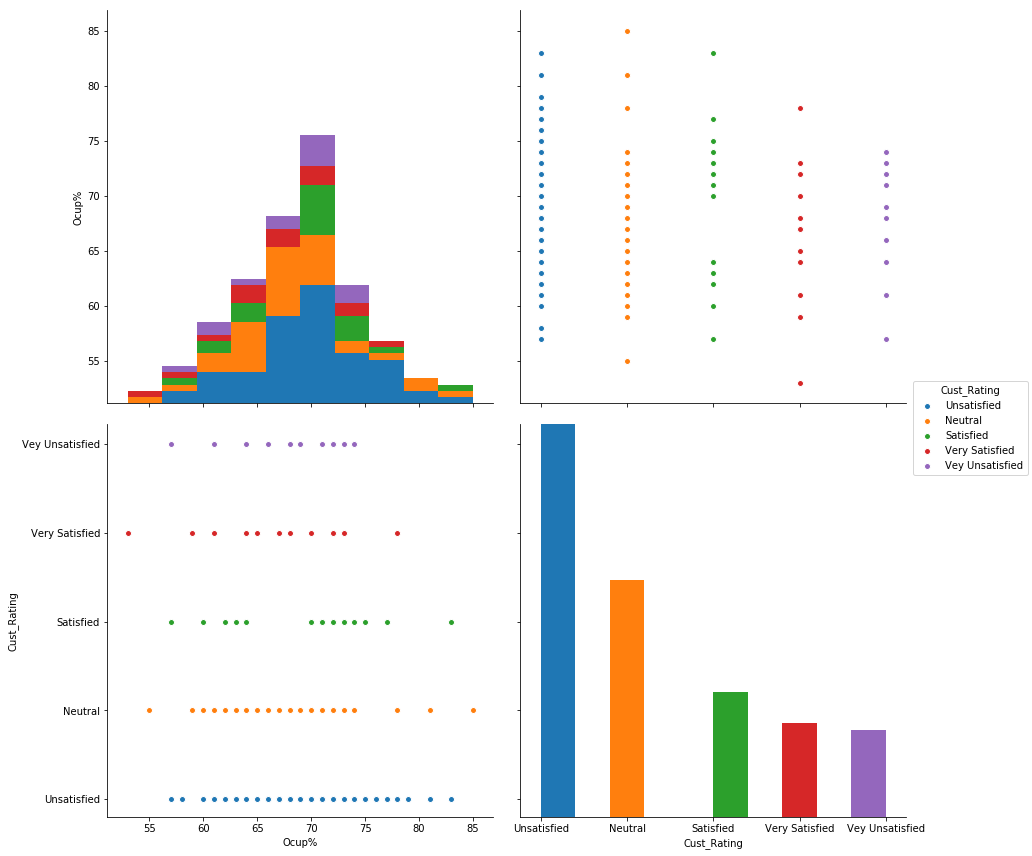

In [196]:
import seaborn as sns
sns.pairplot(Calls, hue='Cust_Rating', vars=['Ocup%', 'Cust_Rating'], size = 6)

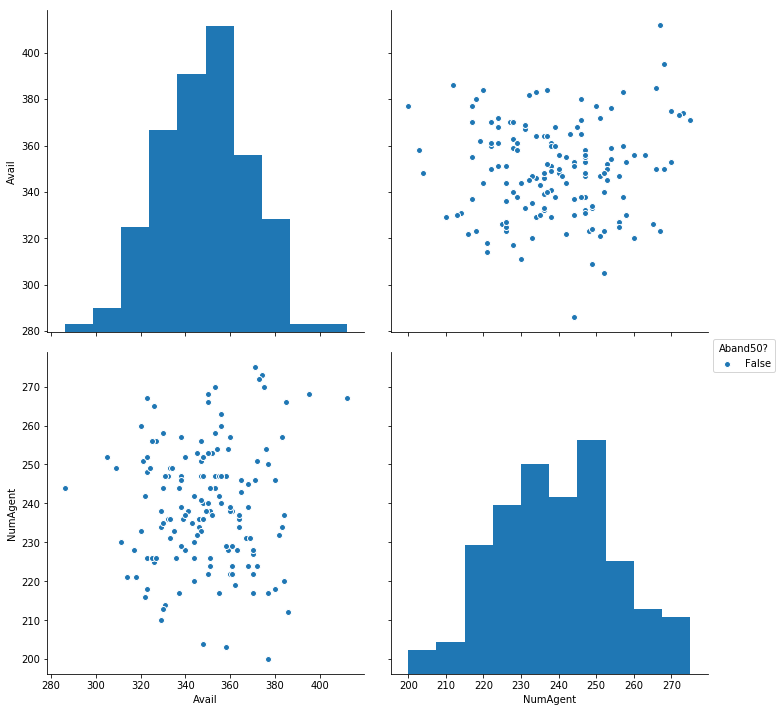

In [197]:
import seaborn as sns
sns.pairplot(Calls, hue='Aband50?', vars=['Avail', 'NumAgent'], size = 5)

### Vertical Count Plot

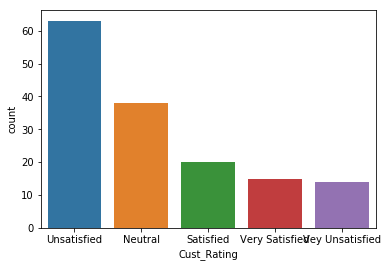

In [198]:
from seaborn import countplot
from matplotlib.pyplot import figure, show


figure()
countplot(data=Calls,x='Cust_Rating')
show()

### Horizontal Count Plot

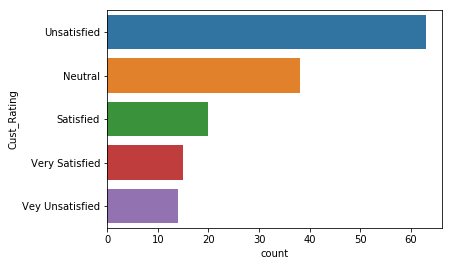

In [199]:
figure()
countplot(data=Calls,y='Cust_Rating')
show()

1. Poisson distribution https://www.investopedia.com/terms/p/poisson-distribution.asp

2. Call Center KPI's  https://www.talkdesk.com/blog/12-call-center-kpis-to-track-for-success/ 

3. Call Center - Global best practices https://www.ifc.org/wps/wcm/connect/75ce96004cf85d4f8752c7f81ee631cc/Tool+9.4.+Measuring+Call+Center+Performance.pdf?MOD=AJPERES

4. Vodafone Net Promoter Score https://npsbenchmarks.com/companies/vodafone-uk


In [ ]:
5. NPS Benchmarking  https://npsbenchmarks.com/companies